In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# plt.rcParams['figure.facecolor'] = 'w'
plt.style.use(['dark_background', 'science', 'notebook'])

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

In [150]:
# generate data
def function(x):
    return -1 + 5*x - 25*x**2 + 2*x**3

df = pd.DataFrame()
n_samples = 10
xmin, xmax = -5, 15
np.random.seed(42)
df['x'] = np.random.uniform(low=xmin, high=xmax, size=(n_samples,))
df['y'] = function(df['x']) + np.random.uniform(-100,100, size=(n_samples,))
X = df['x'].values.reshape(-1, 1)
Y = df['y'].values.reshape(-1, 1)

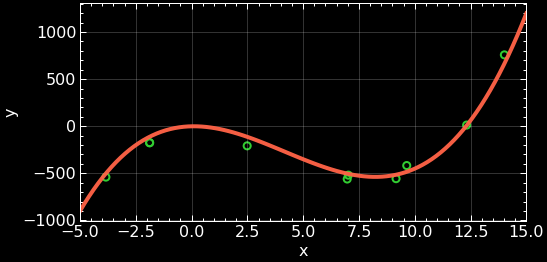

In [151]:
fig, ax = plt.subplots(figsize=(8, 4))
# ymin, ymax = -10, 20
x = np.linspace(xmin, xmax, 100)

ax.plot(x, function(x), c='tomato', lw=4, alpha=0.96, )
ax.scatter(X, Y, s=50, ec='limegreen', fc='none', lw=2)
ax.set(xlabel='x', ylabel='y', #title=f'{sequence}', 
       xlim=[xmin,xmax])#, ylim=[ymin,ymax])
ax.grid(lw=1, alpha=0.2, zorder=0)

In [152]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y_znorm = scaler.fit_transform(Y)

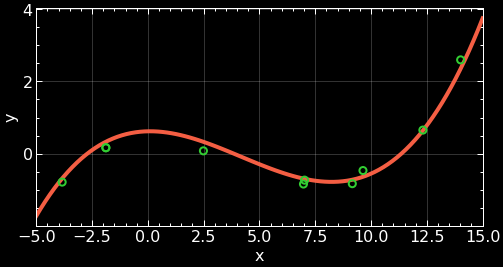

In [154]:
fig, ax = plt.subplots(figsize=(8, 4))
# ymin, ymax = -10, 20
x = np.linspace(xmin, xmax, 100)

ax.plot(x, (function(x)-scaler.mean_)/scaler.scale_, c='tomato', lw=4, alpha=0.96, )
ax.scatter(X, Y_znorm, s=50, ec='limegreen', fc='none', lw=2, zorder=5)
ax.set(xlabel='x', ylabel='y', #title=f'{sequence}', 
       xlim=[xmin,xmax])#, ylim=[ymin,ymax])
ax.grid(lw=1, alpha=0.2, zorder=0)

In [155]:
kernel = RBF(length_scale=1, length_scale_bounds=(1e-3, 1e3))
# kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
model.fit(X, Y_znorm)
x_axis = np.linspace(xmin, xmax, 100).reshape(-1, 1)
yhat, sigma = model.predict(x_axis, return_std=True)

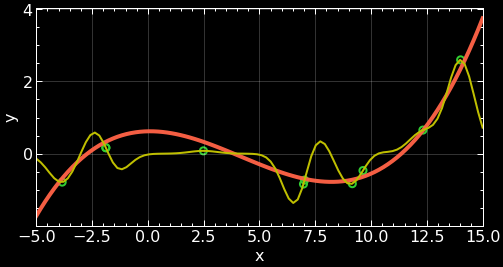

In [156]:
fig, ax = plt.subplots(figsize=(8, 4))
# ymin, ymax = -10, 20
x = np.linspace(xmin, xmax, 100)

ax.plot(x, (function(x)-scaler.mean_)/scaler.scale_, c='tomato', lw=4, alpha=0.96, )
ax.scatter(X, Y_znorm, s=50, ec='limegreen', fc='none', lw=2)
ax.plot(x_axis, yhat, c='y', lw=2)
ax.set(xlabel='x', ylabel='y', #title=f'{sequence}', 
       xlim=[xmin,xmax])#, ylim=[ymin,ymax])
ax.grid(lw=1, alpha=0.2, zorder=0)

In [231]:
np.random.seed(1)
def f(x):
    """The function to predict."""
    # return 2.3 * x + 5.2 * x**(1/2) + 5*np.sin(x)
    return 5+np.sin(x)*np.exp(-x/5)

#  First the noiseless case
# X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T
X = np.atleast_2d([1., 3., 12]).T

# Observations
y = f(X).ravel()

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 15, 1000)).T

# Instantiate a Gaussian Process model
kernel = ConstantKernel(1.0, (1e-3, 1e5)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

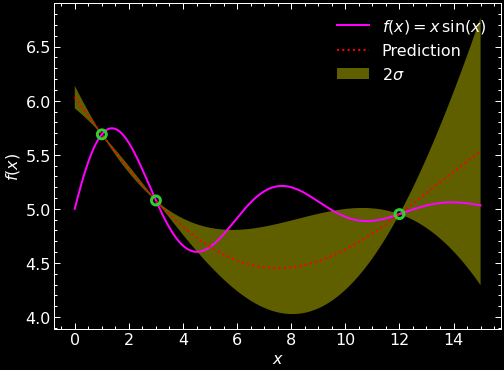

In [236]:
plt.figure()
plt.plot(x, f(x), 'magenta', label=u'$f(x) = x\,\sin(x)$')
plt.scatter(X, y, s=80, ec='limegreen', fc='none', lw=3, zorder=5)
# plt.plot(X, y, 'ro', markersize=10, label=u'Observations')
plt.plot(x, y_pred, 'r:', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 2 * sigma,
                        (y_pred + 2 * sigma)[::-1]]),
         alpha=.5, fc='y', ec='None', label=r'$2\sigma$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$');
# plt.xlim(-10, 20)
plt.legend(loc='best');

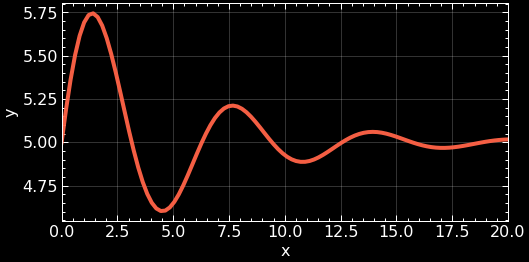

In [229]:
fig, ax = plt.subplots(figsize=(8, 4))
xmin, xmax = 0, 20
x = np.linspace(xmin, xmax, 100)

ax.plot(x, f(x), c='tomato', lw=4, alpha=0.96, )
# ax.scatter(X, Y_znorm, s=50, ec='limegreen', fc='none', lw=2, zorder=5)
ax.set(xlabel='x', ylabel='y', #title=f'{sequence}', 
       xlim=[xmin,xmax])#, ylim=[ymin,ymax])
ax.grid(lw=1, alpha=0.2, zorder=0)

In [192]:
f(4)

19.586138678785847